In [1]:
import numpy as np
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import signal
import timeit

# Overall System Implementation

In [2]:
def overall_system(sig1, sig2, fs, fc, n, w1_mod, w2_mod):
    """ Funktion führt die Kette:  ----Tiefpass -> Modulation -> Demodulation -> Tiefpass---- durch
    sig1   --  zu modulierendes Inputsignal 1
    sig2   --  zu modulierendes Inputsignal 2
    fs     --  Abstastfrequenz
    fc     --  Cutoff-Frequenz des Tiefpassfilter
    n      --  Ordnung des Tiefpassfilter
    w1_mod --  Modulationsfrequenz 1 in Hz angewendet auf Signal 1
    w2_mod --  Modulationsfrequenz 2 in Hz angewendet auf Signal 2
    """
    s1 = lowpass(sig1, fs, fc, n) 
    s2 = lowpass(sig2, fs, fc, n)

    smod1 = modulation(s1, w1_mod, fs)
    smod2 = modulation(s2, w2_mod, fs)
    
    s_mod = smod1 + smod2
    s1_demod = demodulation(s_mod, w1_mod, fs)
    s2_demod = demodulation(s_mod, w2_mod, fs)

    s11 = lowpass(s1_demod, fs, fc, n)
    s22 = lowpass(s2_demod, fs, fc, n)

    return s11, s22

# ---------------------------------------------------------------------------------------------------------------

In [3]:
def modulation(signal, f, fs):
    """ Erzeugt moduliertes Signal
        time   -- Zeitvektor
        signal -- Signal das zu modulieren ist
        f      -- Modulationsfrequenz
        fs     -- Samplingfrequenz
    """
    t_end = len(signal)/fs
    time = np.linspace(0, t_end, t_end * fs, endpoint=True)
    s = np.cos(2*np.pi*f*time)
    return signal*s

In [4]:
def demodulation(signal, f, fs):
    """ Erzeugt demoduliertes Signal aus dem Trägersignal
        time   -- Zeitvektor
        signal -- Trägersignal das zu demodulieren ist
        f      -- Modulationsfrequenz
        fs     -- Samplingfrequenz
    """
    t_end = len(signal)/fs
    time = np.linspace(0, t_end, t_end * fs, endpoint=True)
    s = 2*np.cos(2*np.pi*f*time)
    return signal*s

In [5]:
# Overall_System mit Plots der Amplitudenspektren zur Auswertung/Doku/Präsentation
def overall_system(sig1, sig2, fs, fc, n, w1_mod, w2_mod):
    s1 = lowpass(sig1, fs, fc, n) 
    s2 = lowpass(sig2, fs, fc, n)
    plt.magnitude_spectrum(s2,Fs=fs, label= 'Red Hot Chili Pepers',scale='linear')
    plt.magnitude_spectrum(s1,Fs=fs,label='Daughtry',scale='linear') # plotte Spektrum um zu sehen ob sich die Bänder überlappen
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.legend(title='Bandbegrenzte Signale nach erstem Lowpass')
    #plt.savefig('Bilder\Overall_Mod2.eps') # Für Doku/Präsentation
    #plt.savefig('BANDBEGRENZT.svg') # Für Doku/Präsentation
    plt.show()

    smod1 = modulation(s1, w1_mod, fs)
    smod2 = modulation(s2, w2_mod, fs)
    
    plt.magnitude_spectrum(smod2,Fs=fs, label= 'Red Hot Chili Pepers',scale='linear')
    plt.magnitude_spectrum(smod1,Fs=fs,label='Daughtry',scale='linear') # plotte Spektrum um zu sehen ob Bänder überlappen
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.legend(title='Modulierte Signale')
    #plt.savefig('Bilder\Overall_Mod2.eps') # Für Doku/Präsentation
    #plt.savefig('Bilder\BAND_SCHLECHT.svg') # Für Doku/Präsentation
    plt.show()
    
    s_mod = smod1 + smod2
    s1_demod = demodulation(s_mod, w1_mod, fs)
    s2_demod = demodulation(s_mod, w2_mod, fs)

    s11 = lowpass(s1_demod, fs, fc, n)
    s22 = lowpass(s2_demod, fs, fc, n)
    
    plt.magnitude_spectrum(s22,Fs=fs, label= 'Red Hot Chili Pepers',scale='linear')
    plt.magnitude_spectrum(s11,Fs=fs,label='Daughtry',scale='linear') # plotte Spektrum um zu sehen ob Bänder überlappen
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.legend(title='Demodulierte Signale nach zweitem Lowpass')
    #plt.savefig('Bilder\Overall_Mod2.eps') # Für Doku/Präsentation
    #plt.savefig('Bilder\BAND_SCHLECHT.svg') # Für Doku/Präsentation
    plt.show()

    return s11, s22

# ---------------------------------------------------------------------------------------------------------------
## Teste Modulation mit Audiosignalen

In [6]:
len_sample = 340000

#### Audiosignal 1

In [7]:
data1, fs1 = librosa.load('Feels_Like_Tonight.wav',sr=None)

print(data1.shape)
print("Abstastungsfrequenz: ",fs1)

begin1 = 3500000
sig1 = data1[begin1:begin1 + len_sample]
ipd.Audio(sig1, rate=fs1) 

(10479744,)
Abstastungsfrequenz:  44100


#### Audiosignal 2

In [8]:
data2, fs2 = librosa.load('Red_Hot_Chili_Peppers.wav', sr=None)

print(data2.shape)
print("Abtastfrequenz: ",fs2)

begin2 = 5000000
sig2 = data2[begin2: begin2 + len_sample]
ipd.Audio(sig2, rate=fs2) 

(11827584,)
Abtastfrequenz:  44100


In [9]:
fs = fs1 # Sampling rate of both Audio Files

#### Amplitudenspektrum der verwendeten Audio Signale

C:\Users\marku\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
C:\Users\marku\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


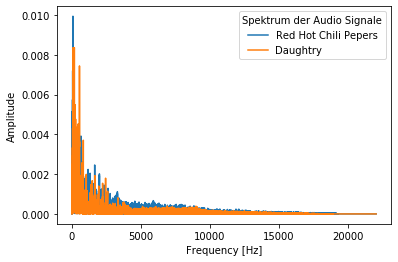

In [10]:
plt.magnitude_spectrum(sig2,Fs=fs, label= 'Red Hot Chili Pepers',scale='linear')
plt.magnitude_spectrum(sig1,Fs=fs,label='Daughtry',scale='linear') # plotte Spektrum um zu sehen ob sich die Bänder überlappen
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend(title='Spektrum der Audio Signale')
plt.savefig('UNBEGRENZT.svg') # Für Doku/Präsentation
plt.show()

#### Definiere alle sonstigen Funktionen die gebraucht werden

In [11]:
def sampling(t_end, sampling_freq):
    """ Erzeugt Zeitvektor
        t_end          --  Zeit bis zu der das Signal gehen soll
        sampling_freq  --  Sampling Frequenz fs
    """
    sampling = np.linspace(0, t_end, t_end * sampling_freq, endpoint=True)
    return sampling

In [12]:
def rec_FFT(f):
    """ Recursive FFT calculation of sample data f """
    f = np.asarray(f)
    n = f.shape[0]
    if n == 1:
        return f
    else:
        f_even = f[::2]
        f_odd = f[1::2]
        g = rec_FFT(f_even)
        u = rec_FFT(f_odd)
        c = np.zeros(n, dtype=complex)
        for k in range(n//2):
            c[k] = g[k] + u[k]*np.exp(-2j*np.pi*k/n)
            c[k+n//2] = g[k] - u[k]*np.exp(-2j*np.pi*k/n)
    return c

In [13]:
def IFFT_rec(z):
    """ Recursive FFT calculation of samples f """
    z = np.asarray(z, dtype=complex)
    n = z.shape[0]
    z_even = z[::2]
    z_odd = z[1::2]
    
    if n == 1:
        return z
    else:
        g = IFFT_rec(z_even)
        u = IFFT_rec(z_odd)
        c = np.zeros(n, dtype=complex)
        
        for k in range(n//2):
            temp = u[k]*np.exp(2j*np.pi*k/n)
            c[k]      = g[k] + temp
            c[k+n//2] = g[k] - temp
    return c

In [14]:
def IFFT(z):
    n = len(z)
    f = IFFT_rec(z)
    return np.real(f)/n

In [16]:
def fastConvolution(f_arg, g_arg):
    """ Berechne schnelle Faltung von 2 Inputsignalen
    f_arg  --  Inputsignal 1
    g_arg  --  Inputsignal 2
    """
    if f_arg.size >= g_arg.size: # Bezeichne längeres Signal als f
        f = f_arg                # Bezeichne kürzeres Signal als g
        g = g_arg
    else:
        f = g_arg
        g = f_arg
        
    G = g.shape[0]               # Länge "Impulsantwort"       
    F = 8*G                      # Länge Fenster --> grobe Festlegung, Daumenregel aus Vorlesung
    F = 2**(int(np.log2(F)) + 1) # F>G UND 2er-Potenz, es wird die nächste 2-er Potenz berechnet zu 8*G
    
    g = np.pad(g, (0, F-G), 'constant', constant_values=(0,0)) # Füge F-G Nullen ans Ende von g ein
    f = np.pad(f, (G-1, 0), 'constant', constant_values=(0,0)) # Füge G-1 Nullen an Anfang von f ein
    len_F = len(f)         # Länge des zero gepaddeten Signals f
    h = [];                # Initialisiere leeren Array h  
    delta = F - G + 1
    s = 0                  # Shift-Index       
    while True: 
        f_block = [];
        if s+F-1 >= len_F: #Abbruchbedingung der while-Schleife Vor "break" muss noch  verbleibendes Signal verarbeitet werden
            signal_remaining = f[s:]  
            part_for_FFT = np.concatenate((signal_remaining, np.zeros(F-len(signal_remaining))) )
            cyc = np.fft.ifft(rec_FFT(part_for_FFT)*rec_FFT(g))   # Zyklische Faltung
            h = np.concatenate((h, cyc[G-1: G+len(signal_remaining)-1]))
            break
        else:
            f_block = f[s:s+F]
            z =  np.fft.ifft( rec_FFT(f_block) * rec_FFT(g) )  #Zyklische Faltung
            h = np.concatenate((h, z[G-1: F]))
            s = s + delta
        
    h = np.array(h, dtype=np.float64)    
    return h

In [17]:
def lowpass(samples, w_s, w_c, n):
    """
    samples -- Gesampelte Daten
    w_s     -- sampling frequency w_s = 1/ T_A
    w_c     -- Cutoff-Frequenz, Frequenzen > w_c werden rausgefiltert
    n       -- Ordnung des Filters für Filterkoeffizienten
    """
    w_c_head = 2 * w_c / w_s
    x = np.zeros(n)
    w = np.zeros(n)
    h = np.zeros(n)
    for k in range(n):
        x[k] = w_c_head * np.sinc(w_c_head * (k - 0.5*n))
        w[k] = 0.54 - 0.46 * np.cos(2 * np.pi * k/n)  
    h = x * w
    convolved = fastConvolution(samples, h) #signal.fftconvolve(samples, h)
    return convolved

In [18]:
n = 1024 # Ordnung des Filters

# Auswertung

## Frequenzbänder überlappen sich nicht

C:\Users\marku\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


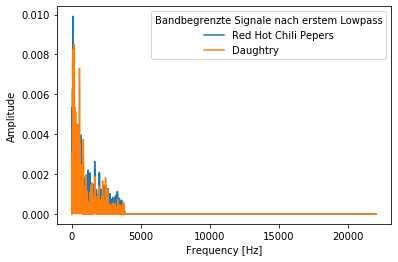

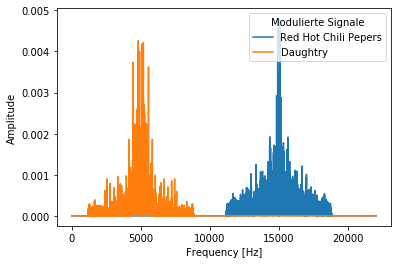

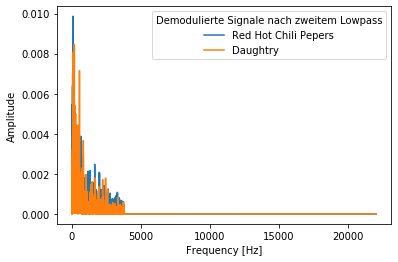

In [19]:
w1_mod =  5000
w2_mod =  15000
fc = 3.8E3 
sig11, sig22 = overall_system(sig1, sig2, fs, fc, n, w1_mod, w2_mod) # Wie fc, n, w1_mod und w2_mod wählen für gute Quali?

In [20]:
ipd.Audio(sig11, rate=fs) # load a NumPy array

In [21]:
#librosa.output.write_wav('Ergebnis_NOToverlap.wav', sig22, fs)
ipd.Audio(sig22, rate=fs) # load a NumPy array

Signale klingen gut, sind mit guter Qualität anzuhören.

## Frequenzbänder überlappen sich

C:\Users\marku\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


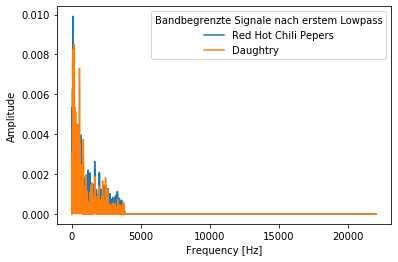

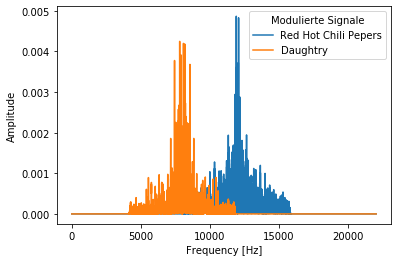

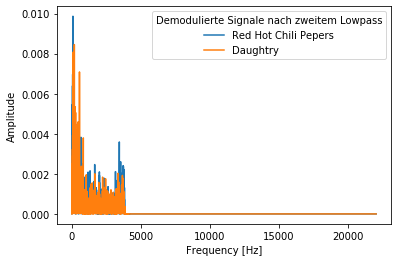

In [22]:
w1_mod =  8000
w2_mod =  12000
sig111, sig222 = overall_system(sig1, sig2, fs, fc, n, w1_mod, w2_mod) # Wie fc, n, w1_mod und w2_mod wählen für gute Quali?

In [23]:
ipd.Audio(sig111, rate=fs) # load a NumPy array

In [24]:
#librosa.output.write_wav('Ergebnis_overlap.wav', sig222, fs)
ipd.Audio(sig222, rate=fs) # load a NumPy array

Rekonstruierte Signale enthalten Störfrequenzen, die den Hörgenuss negativ beeinflussen. Ein "metallisches" Klirren und Klimpern ist zu hören.
Die Musiktitel können erkannt und zugeordnet werden aber anhören mag man sie so nicht.
In den rekonstruierten Signalen sind Frequenzen in einer Stärke  enthalten, die in den ursprünglichen Signalen überhaupt nicht in dieser Stärke vorkommen. Die Ursache ist im Überlappen der Frequenzbänder der modulierten Signale zu finden.

Für sehr geringe Filterordnungen zB n=32 wird die Qualität schlechter, die Freqqunzbänder sind nicht hart, sondern softer gecuttet wozu es zu mehr überlappungen kommt.